# Clustering Homework 

Deskripsi     : Script berikut ini adalah template untuk mengerjakan Homework Data MBA Batch #3 Topik Clustering. Komentar-komentar yang ada di dalamnya bisa Anda jadikan referensi untuk membuat kode sesuai dengan step-step yang sudah dituliskan di dalamnya. 

Dataset       : Data-Jumlah-Kunjungan-Wisman-Ke-Indonesia-Berdasarkan-Pintu-Masuk-Tahun-2014. https://data.jakarta.go.id/dataset/data-jumlah-kunjungan-wisman-ke-indonesia-berdasarkan-pintu-masuk-di-dki-jakarta/resource/29c551a3-2d18-4130-b3f9-fc414c03a710

Referensi     : Buku Fundamental of Machine Learning with Python (by Teguh Wahyono)

Curated by    : B. Ari Kuncoro (IYKRA)

## Latar Belakang

Pemerintah Indonesia ingin mengetahui prioritas pembangunan dan penempatan tenaga kerja di bidang pariwisata. Untuk itu, mereka ingin mengelompokkan gerbang pintu masuk wisatawan mancanegara berdasarkan jumlah wisman yang berkunjung ke Indonesia.


## Bagaimana cara melakukan clustering?

Langkah pertama yang mesti kita lakukan adalah dengan memanggil library atau pustaka yang dibutuhkan, yaitu matplotlib (plt) gunakan , numpy (np), pandas (pd), dan sklearn (khususnya sklearn.cluster, KMeans). 

In [7]:
# Step 1. Memanggil Library yang dibutuhkan 

# Write your code here! 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering as AC
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

Langkah kedua adalah memanggil Dataset 

In [4]:
# Step 2. Memanggil dataset

# Write your code here! 
df = pd.read_csv('data_kunjungan.csv')

In [5]:
# Menampilkan 5 baris pertama dari dataset 

# Write your code here! 
df.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


Langkah ketiga adalah dengan melakukan konversi dataset ke data array 

In [13]:
# Step 3. Konversi Dataset ke Data Array, assign sebagai X 

# Write your code here!
X = np. asarray(df.drop('pintu_masuk',axis=1))

Langkah keempat adalah menampilkan Data Array ke dalam Scatter plot 

Text(0.5, 1.0, 'Grafik Jan vs Feb')

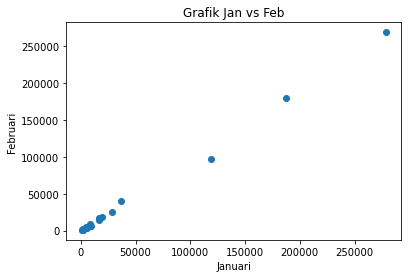

In [14]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 

# Referensi, just uncomment this section: 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Januari")
plt.ylabel("Februari")
plt.title("Grafik Jan vs Feb")

Langkah kelima adalah membuat Scree plot dan aktivasi KMeans

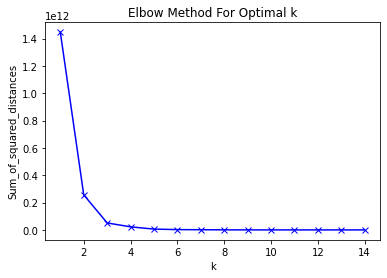

In [15]:
# Step 5a: Membuat Scree Plot 

# Reference: Just uncomment this script 
Sum_of_squared_distances = []
K = range(1,15) # Range of 1 to 15
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
# Step 5b. Melakukan aktivasi algoritma K-Means, 
# pilih berapa jumlah n_cluster berdasarkan elbow method 
k = 3

# Hint: KMeans, km.fit()
# Write your code here!
km = KMeans(n_clusters=k)
km = km.fit(X)

Langkah keenam adalah menampilkan nilai centroid dan label data point 

In [22]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh 
# algoritma kmeans. Hint: cluster_centers_ 

# Write your code here! 
km.cluster_centers_

array([[  9895.11764706,   9146.58823529,  10614.70588235,
          9158.29411765,   9796.52941176,  10175.23529412,
          8657.17647059,   9402.05882353,   8942.35294118,
          9772.        ,   9817.05882353,  12454.        ],
       [153088.5       , 138903.5       , 158369.5       ,
        146358.        , 149928.5       , 174421.        ,
        135550.5       , 165179.        , 143629.5       ,
        151721.5       , 151856.5       , 181252.5       ],
       [278685.        , 269367.        , 268418.        ,
        277925.        , 285965.        , 329654.        ,
        358907.        , 336628.        , 352017.        ,
        339200.        , 293858.        , 341111.        ]])

In [26]:
df

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0
5,Juanda,16870.0,16476.0,18776.0,19145.0,20299.0,18685.0,16174.0,18239.0,17124.0,17997.0,18324.0,19084.0
6,Entikong,1535.0,1609.0,1699.0,1430.0,1785.0,1703.0,2488.0,1568.0,1445.0,1731.0,1936.0,3535.0
7,Adi Sumarmo,774.0,803.0,1114.0,1029.0,1692.0,1042.0,1125.0,1399.0,1258.0,1122.0,853.0,700.0
8,Minangkabau,5497.0,2889.0,4327.0,3916.0,4573.0,3779.0,3926.0,3364.0,3857.0,3515.0,3990.0,6563.0
9,Tanjung Priok,5496.0,4867.0,8767.0,5182.0,5594.0,4892.0,4458.0,4902.0,4248.0,5287.0,5915.0,5333.0


In [24]:
df.shape

(20, 13)

In [23]:
# Checking 
# Just uncomment the following code and run

print(km.labels_)

[1 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Langkah ketujuh adalah visualisasi hasil clustering

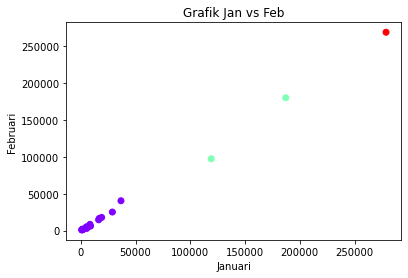

In [27]:
# Step 7 Visualisasi Hasil 

# Uncomment and change the labels in the code and run
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')
plt.xlabel("Januari") # change label!

# Change the title "Grafik Konsumen", label y axis "Pengeluaran" to the appropriate term. 
plt.ylabel("Februari")  # change label!
plt.title("Grafik Jan vs Feb")  # change label!
plt.show()  # change label!

Langkah kedelapan adalah menampilkan hasil centroid di dalam grafik

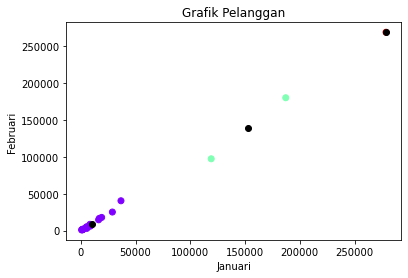

In [28]:
# Step 8 Menampilkan hasil centroid di dalam grafik 

# Uncomment and change the labels for the following code and run
plt.scatter(X[:,0],X[:,1], c=km.labels_, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black')
plt.xlabel("Januari")
plt.ylabel("Februari")
plt.title("Grafik Pelanggan")
plt.show()

In [29]:
df.head()

,pintu_masuk,januari,februari,maret,april,mei,juni,juli,agustus,september,oktober,november,desember
0,Soekarno-Hatta,187123.0,180362.0,194720.0,180787.0,184534.0,208624.0,169135.0,218903.0,174169.0,177274.0,180208.0,190598.0
1,Ngurah Rai,278685.0,269367.0,268418.0,277925.0,285965.0,329654.0,358907.0,336628.0,352017.0,339200.0,293858.0,341111.0
2,Kualanamu Int'.,19029.0,17780.0,18493.0,15956.0,19781.0,19376.0,16579.0,16901.0,17792.0,20946.0,22848.0,29243.0
3,Batam,119054.0,97445.0,122019.0,111929.0,115323.0,140218.0,101966.0,111455.0,113090.0,126169.0,123505.0,171907.0
4,Sam Ratulangi,1694.0,1079.0,1340.0,1079.0,1365.0,1487.0,1652.0,1854.0,1652.0,1642.0,943.0,1492.0


In [33]:
# Memasukkan hasil label ke dalam suatu data frame 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(km.labels_)
data_clustered = data_clustered.sort_values('cluster')
display(data_clustered)
data_clustered = np.asarray(data_clustered)

,0,1,2,3,4,5,6,7,8,9,10,11,cluster
9,5496.0,4867.0,8767.0,5182.0,5594.0,4892.0,4458.0,4902.0,4248.0,5287.0,5915.0,5333.0,0
17,28811.0,25090.0,27009.0,24205.0,22204.0,30867.0,31102.0,31388.0,23661.0,25882.0,22733.0,27909.0,0
16,16257.0,14560.0,21463.0,13490.0,14588.0,16899.0,6166.0,10545.0,14068.0,15018.0,16539.0,20799.0,0
15,8855.0,6132.0,8234.0,7569.0,8679.0,7061.0,5394.0,8488.0,5221.0,7932.0,7172.0,8419.0,0
14,2399.0,2117.0,2130.0,1907.0,2502.0,2247.0,1713.0,1823.0,1912.0,2334.0,2776.0,3522.0,0
13,963.0,1089.0,1244.0,1106.0,1074.0,1425.0,848.0,1265.0,1125.0,1141.0,1015.0,861.0,0
12,1707.0,1213.0,1159.0,1241.0,1124.0,1134.0,1106.0,1625.0,1389.0,1279.0,1337.0,1399.0,0
11,5105.0,4862.0,5987.0,5413.0,6499.0,6071.0,6582.0,7259.0,6532.0,5438.0,3748.0,6385.0,0
10,8236.0,6132.0,9057.0,8227.0,8041.0,9773.0,7149.0,8589.0,7327.0,6716.0,7818.0,10607.0,0
19,36660.0,40406.0,40706.0,37175.0,38010.0,36464.0,34367.0,33081.0,35632.0,39980.0,41005.0,54940.0,0


Langkah kesembilan mengevaluasi hasil: Similarity Matrix dan Dunn's Index


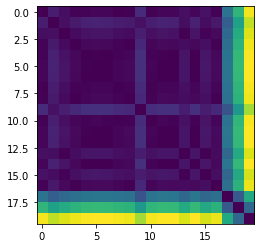

In [34]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [ ]:
# Menghitung Dunn's index 
# Mengingat tidak ada function Dunn's Index dalam sklearn, kita gunakan alternatif lain yaitu DB Index. 
# Silakan baca referensi berikut

In [36]:
# Menghitung DB index
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(X, km.labels_))
# interpretation of DB index :Lower the DB index value, better is the clustering

0.26854447009778637


Referensi: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/ 

In [ ]:
# Namun ketika dicoba, package sklearn mesti dinaikkan versinya menjadi versi 0.21.2
# Alternatif lain, kita bisa melakukan pembuatan function seperti pada referensi berikut ini: 

Referensi: https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6